# Computational Social Science Project #3 

**Enter your Name:** Rachel Pizatella-Haswell
Group members: Sam Ayers

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

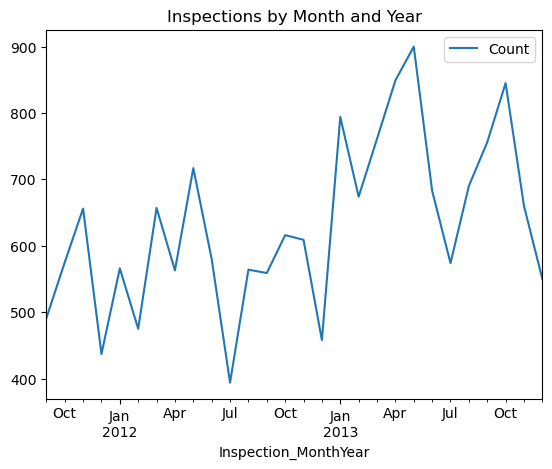

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

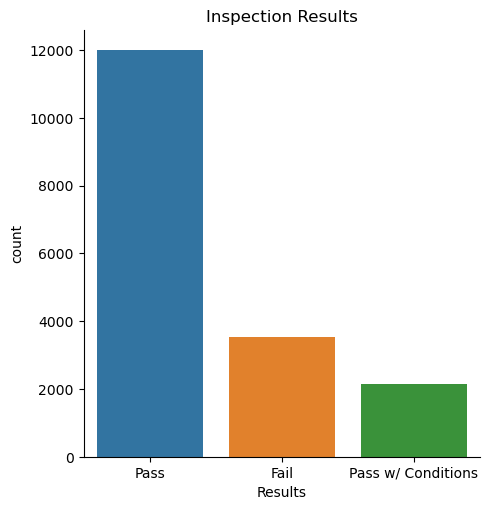

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

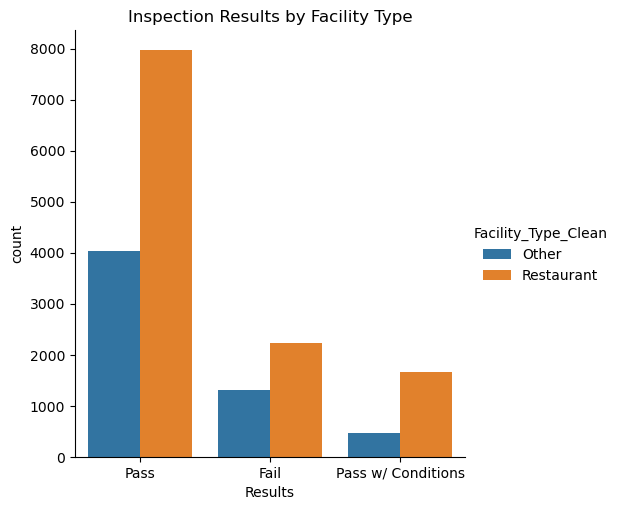

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

## Answer
I chose to keep the y variable binarized because I think it will easier to interpret pass/fail. I don't know enough about this dataset to understand how to interpret pass with conditions. Additionally, I include a logit model, which requires a binary outcome. 

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Answer 
#### <u>Random Forest</u>
**Logic**

Random forest is an ensemble learner. It creates many different decision trees by running a learning algorithm on random subsamples of data, a process known bagging. One problem with bagging; however, is that strong predictors can create trees that have the same feature split over and over again, which can lead to high variance even if you are averaging results across trees. Random forest solves this problem by taking a random sample of features such that the subset of features will vary across trees. 

Splits are based on minimizing the residual sum of squares,  
$$
RSS = ∑left(yᵢ - yL)²+ ∑right (yi – yR)²
$$

where ŷL = mean y-value for left node

ŷR = mean y-value for right node 

**Pros/Cons**

Random forests can improve on other tree methods by allowing for variation across features within each tree. When you take the average across trees, this method will help reduce variance. 

**Application**

The process of creating a random forest classifier is: 
1. Estimate lots of trees on multiple samples. 
2. At each tree node, take a random sample of m features (out of d). The m subset will differ within and across trees. 
3. Choose the best split from m features (without looking at other features). 
4. Vote or average the results across trees. 

#### <u>XGBoost</u>

**Logic**

Boosting builds a sequence of trees, where each subsequent tree tries to minimize the error of the previous model. The error captures the variation in the outcome variable not accounted for in the model, so by focusing on the error, the next tree captures more of the variation in the outcome. 

XGBoost or extreme gradient boosting combines boosting (described above) and optimization. XGBoost uses a similar approach to build the sequence of models, where each subsequent model tries to minimize the error of the previous model. XGBoost also includes additional regularization techniques, such as L1 and L2 regularization, to prevent overfitting. 

**Pros/Cons**

*Pros*

XGBoost is generally faster than other Gradient Boosting.

XGBoost makes splits up to the max_depth specified and then starts pruning the tree backward, so it does not stop when it hits a negative loss. 

XGBoost can handle missing data. 

*Cons*

XGBoost is hard to explain and complex. You also need to tune multiple hyperparameters from both boosting and regularization. 

**Application**

*Gradient Tree Boosting*
1. Start with a tree. 
2. Take the error from that tree and apply it to the next tree in place of the outcome variable. 
3. Continue to grow the trees sequentially

XGBoost adds regularization to traditional boosting. It checks validation data to make hyperparameter decisions as it goes. For example, it finds the optimal tree depth for each tree at each iteration (instead of trying many tree depths). It looks ahead at splits to make decisions about what works best. 

#### <u>Logit</u>
**Logic**

Logit model is similar to OLS in that it is a statistical method, not a tree-based method. Unlike OLS, logit is used when the outcome is binary (not continuous). It uses the logistic function or sigmoid function $f(x)= \frac{1}{{1 + e^{-x}}}$ to predict the probability that an observation either belongs to the pass category or fail category. 

**Assumptions**

Logit assumptions include: 
1. Outome variable is binary, like pass/fail. 
2. No multicollinearity between the features. 
3. The relationship between the independent variables and the log odds of the dependent variable should be linear.
4. No outliers
5. The sample size should be sufficiently large. 

**Pros/Cons**

*Pros*

Interpretation is somewhat easy. Coefficients in logistic regression can be interpreted as the change in log-odds for a one-unit change in the corresponding predictor. 

Logistic regression is computationally efficient.

*Cons*

The linear assumption may not hold in all cases, so if the true relationship is nonlinear, prediction will not perform well. 

**Application**

Fit the model on the training data by using an optimization algorithm. 


### Model 1: Random Forest

In [13]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.80,
                                                    test_size=0.20)  

In [14]:
# create model 
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train.ravel(order = 'C'))

RandomForestClassifier()

In [15]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**About the hyperparameters**
I tried with smaller tree depth, and the metrics were worse, so I went with larger tree depth options. This will take a while to run

In [16]:
# Create a hyperparameter grid
grid_space = {'max_depth': [100,150,200], #Depth of the tree
              "criterion": ["gini", "entropy"],
             'n_estimators': [50,100,150], # number of trees in the forest
             'max_features': [1,2,3,4], # max features the RF can try at each split
             'min_samples_leaf':[1,2,3], #Number of obs. required to be in a node
             'min_samples_split':[2,3,4] #How many samples do you need in a node to split it
             }

In [17]:
# Use gridsearch to fit the model
rf_grid = GridSearchCV(rf_classifier, param_grid=grid_space, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train.ravel(order = 'C'))

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 150, 200],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [18]:
# extract the best model
rf_best_model = rf_grid.best_estimator_

###  Model 2: XGBoost

**Rationale for no grid search**
I think XGBoost runs a cross-validation at each iteration of the boosting process, so we do not need a grid search. I could be wrong, though. 

In [19]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 


### Model 3: Logit

In [20]:
#Set up the logistic regression model
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [21]:
# fix the data
nan_indices = np.isnan(X_train_std)
np.where(nan_indices)[0]

array([], dtype=int64)

In [22]:
# create a model
logit_reg = LogisticRegression(max_iter=1500)

# fit the model
logit_model = logit_reg.fit(X_train_std, y_train.ravel(order = 'C'))


In [23]:
param_grid = {'penalty': ['l1','l2'],
              'C': np.arange(.1, 1, .1),
               'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

In [24]:
# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)


In [25]:
logit_grid.fit(X_train_std, 
              y_train.ravel(order = 'C'))


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1500),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [26]:
# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_test)

In [27]:
logit_grid_model = logit_grid.best_estimator_

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

### Answer 
**Accuracy** measures the percent of predictions that are correct (either true positive or true negative). 

**Recall** calculates the percentage of true positives predicted by the model out of all the actual positives. This is true positive/actual positives, so it includes false negatives.

**Precision** calculates the percentage of true positives out of all the predicted positives. This is true positive/predicted positives, so it includes false negatives.

**F1 score** combines precision and recall. 
$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

**Priority**

Accuracy is imperfect if classes are imbalanced. For example, if we have 95% of instances from class A and 5% from class B, a model that predicts all instances as class A will still achieve 95% accuracy. The precision-recall tradeoff means that high precision often leads to low recall and vise versa. 

If we are only going to rely on one metric, F1 score makes sense. F1 captures false positives and false negatives. It penalizes both low precision and low recall. 

**Assessment of models**
The models score highest on accuracy and recall, suggesting the models are better at classifying the correct pass/fail results (recall). However, they may overindexing false positives (precision).

**Accuracy** All of the models have similar accuracy rates, suggesting they are good at predicting true positives and true negatives combined.

**Recall** Of all true positives, the random forest and best random forst models predict close to 90% correctly.

**Precision** All of the models do worse on precision than recall, but are vey similar across models.

**F1 score** The two random forest models do slightly better (but very similar to the other models) on F1 score. 


In [28]:
# loop through models 
for clf, label in zip([rf_best_model, 
                       rf_classifier,
                       xgb_classifier,
                       logit_grid_model], ['Best random forest', 
                                            'Random Forest',
                                            'XGBoost', 
                                            'Logit']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Best random forest]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.92 [XGBoost]
Accuracy: 0.92 [Logit]


In [29]:
for clf, label in zip([rf_best_model, 
                       rf_classifier,
                      xgb_classifier,
                       logit_grid_model], ['Best random forest', 
                                            'Random Forest',
                                            'XGBoost', 
                                            'Logit']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='recall', 
                                  cv=5)
         print('Recall: %0.2f [%s]' % (scores.mean(), label))

Recall: 0.87 [Best random forest]
Recall: 0.89 [Random Forest]
Recall: 0.85 [XGBoost]
Recall: 0.86 [Logit]


In [30]:
for clf, label in zip([rf_best_model, 
                       rf_classifier,
                      xgb_classifier,
                       logit_grid_model], ['Best random forest', 
                                            'Random Forest',
                                            'XGBoost', 
                                            'Logit']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='precision', 
                                  cv=5)
         print('Precision: %0.2f [%s]' % (scores.mean(), label))

Precision: 0.78 [Best random forest]
Precision: 0.77 [Random Forest]
Precision: 0.78 [XGBoost]
Precision: 0.77 [Logit]


In [31]:
for clf, label in zip([rf_best_model, 
                       rf_classifier,
                      xgb_classifier,
                       logit_grid_model], ['Best random forest', 
                                            'Random Forest',
                                            'XGBoost', 
                                            'Logit']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='f1', 
                                  cv=5)
         print('f1: %0.2f [%s]' % (scores.mean(), label))

f1: 0.82 [Best random forest]
f1: 0.82 [Random Forest]
f1: 0.81 [XGBoost]
f1: 0.81 [Logit]


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

## Answer
**Which features contribute to your predictions?**
1.	seriousCount	
2.	minorCount	
3.	heat_garbage	
4.	heat_burglary	
5.	ageAtInspection	
6.	heat_sanitation	
7.	temperatureMax	
8.	windSpeed	
9.	humidity	
10.	POLICE_DISTRICT

**Are there any additional features you wish you could incorporate that you don’t have available in this analysis?**

Financial information, customer reviews and product sourcing information may provide additional insights regarding the liklihood of passing. Poor financial management, bad cuatomer reviews and low quality products may be correlated with poor food safety. 


In [32]:
# create feature importance dataframe for best model
feat_rfbest = pd.concat([pd.DataFrame(X.columns),
                                   pd.DataFrame(np.transpose(rf_best_model.feature_importances_))], 
                                  axis = 1)
feat_rfbest.columns = ["Feature", "Importance"]
feat_rfbest = feat_rfbest.sort_values('Importance', ascending=False)
feat_rfbest

,Feature,Importance
1,seriousCount,0.561123
2,minorCount,0.042524
28,heat_garbage,0.036123
27,heat_burglary,0.034895
10,ageAtInspection,0.033117
29,heat_sanitation,0.032495
24,temperatureMax,0.031060
25,windSpeed,0.030700
26,humidity,0.028023
9,POLICE_DISTRICT,0.026967


**Feature importance and coefficient size**
I include feature importance graphs for both random forest classifiers and the XGBoost classifier. I include the coefficient plot for the logit model because I think it's easier to interpret

In [33]:
# create feature importance dataframe for rfclassifier 
feat_rf = pd.concat([pd.DataFrame(X.columns),
                              pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], 
                             axis = 1)
feat_rf.columns = ["Feature", "Importance"]

# create feature importance dataframe for xgboost
importances = np.zeros(X.shape[1])

for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
importances /= 5  

feat_xgb = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

feat_xgb = feat_xgb.sort_values('importance', ascending=False)

feat_xgb = feat_xgb.head(10)

# create coefficient dataframe for logit 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_grid_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

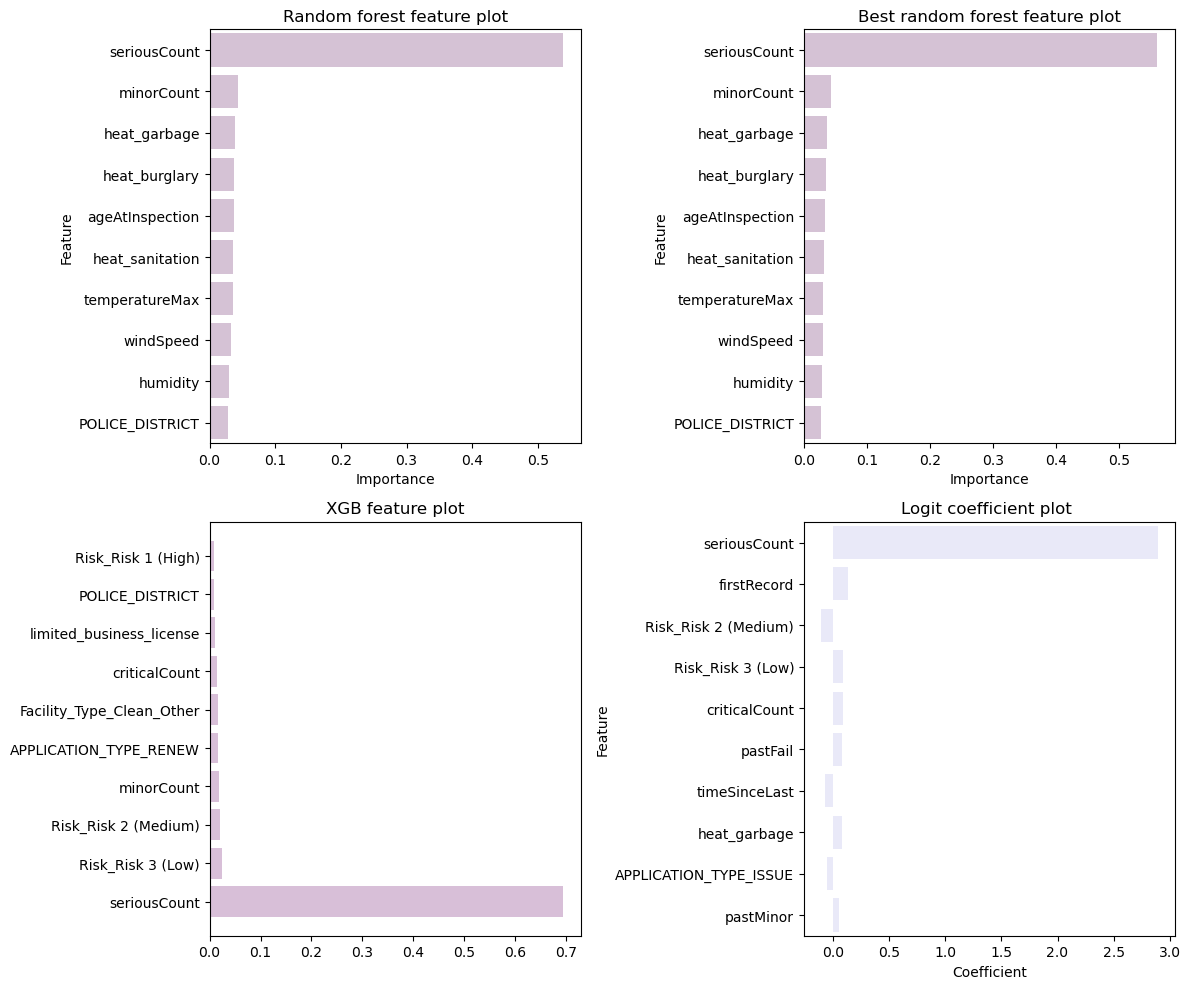

In [34]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Barplot for the 10 most important features from feat_importances
sns.barplot(x="Importance", y="Feature", data=feat_rf.nlargest(10, 'Importance'), ax=axes[0, 0], color="thistle")
axes[0, 0].set_title('Random forest feature plot')

# Plot 2: Barplot for the 10 most important features from feat_importances_best
sns.barplot(x="Importance", y="Feature", data=feat_rfbest.nlargest(10, 'Importance'), ax=axes[0, 1], color="thistle")
axes[0, 1].set_title('Best random forest feature plot')

# Plot 3: Horizontal bar plot for feature_importance
axes[1, 0].barh(feat_xgb['feature'], feat_xgb['importance'], color='thistle', align='center')
axes[1, 0].set_title('XGB feature plot')

# Plot 4: Barplot for the top 10 Logit Coefficients
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef'), ax=axes[1, 1], color="lavender")
axes[1, 1].set_title('Logit coefficient plot ')

# Format
plt.tight_layout()
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

## Answer
**How did random auditing compare to predictive auditing?**

The way I simulated the random audit is to randomly select 1000 observations from the original data, then treat it like test data. I used my best RF model to predict the results. Then, I measured the accuracy, recall, precision and F1 of those results. In the real world this would be similar to predicting establishments that would likely fail; auditing them and seeing if they actually fail. Note, that in the real world we would likely only visit the predicted failers, but we have data on passers as well. Therefore, our metrics include both. 

The random audit simulation using the best random forest classifier scores above 90 across all metrics. This means that false positives and false negatives are both relatively low. That is to say, the prediction is fairly good at not passing establishments with healthcode violations and not failing establishments with good food safety. 


In [35]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# rf best model 
# Use the .predict() method to get predictions
y_pred_best = rf_best_model.predict(X_test)

# Use the .predict_proba() method to get probability estimates
proba_predictions = rf_best_model.fit(X_train, y_train.ravel()).predict_proba(X_test)[:,1]
proba_predictions

# Combine predictions and probabilities into a DataFrame
results_df = pd.DataFrame({'Prediction': y_pred_best, 'Probability': proba_predictions})

In [36]:
# rf classifier 
# Use the .predict() method to get predictions
y_pred = rf_best_model.predict(X_test)

# Use the .predict_proba() method to get probability estimates
prob_rf = rf_classifier.fit(X_train, y_train.ravel()).predict_proba(X_test)[:,1]
prob_rf

# Combine predictions and probabilities into a DataFrame
results_rf = pd.DataFrame({'Prediction': y_pred, 'Probability': prob_rf})

In [37]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Order audits by the probability of detecting a "Fail" score
sorted_results = results_df.sort_values(by='Probability', ascending=False)

# first 1,000 observations
subset_results = sorted_results.head(1000)
subset_results

,Prediction,Probability
2937,1,0.866443
284,1,0.862497
1705,1,0.858438
2322,1,0.856708
955,1,0.854630
...,...,...
2930,0,0.112741
54,0,0.112740
1326,0,0.112641
1105,0,0.112146


In [38]:
# rf classifier 
# Order audits by the probability of detecting a "Fail" score
sorted_results_rf = results_rf.sort_values(by='Probability', ascending=False)

# first 1,000 observations
subset_results_rf = sorted_results_rf.head(1000)
subset_results_rf


,Prediction,Probability
2937,1,0.96
2109,1,0.96
2362,1,0.96
2116,1,0.95
1049,1,0.95
...,...,...
2762,0,0.08
901,0,0.08
2755,0,0.08
2045,0,0.08


In [39]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

**Multiple plots** I think the RF classifier and best RF classifier are pretty similar, so I wanted to see how each of them perform. I also wanted to see if there are differences across all predictions and the first 1000. The figures have titles. You can see that the Best RF model is on the left with all observations in the top left and the first 1000 observations on the bottom left. The RF model is on the right with all observations in the top right and the first 1000 observations on the bottom right. 

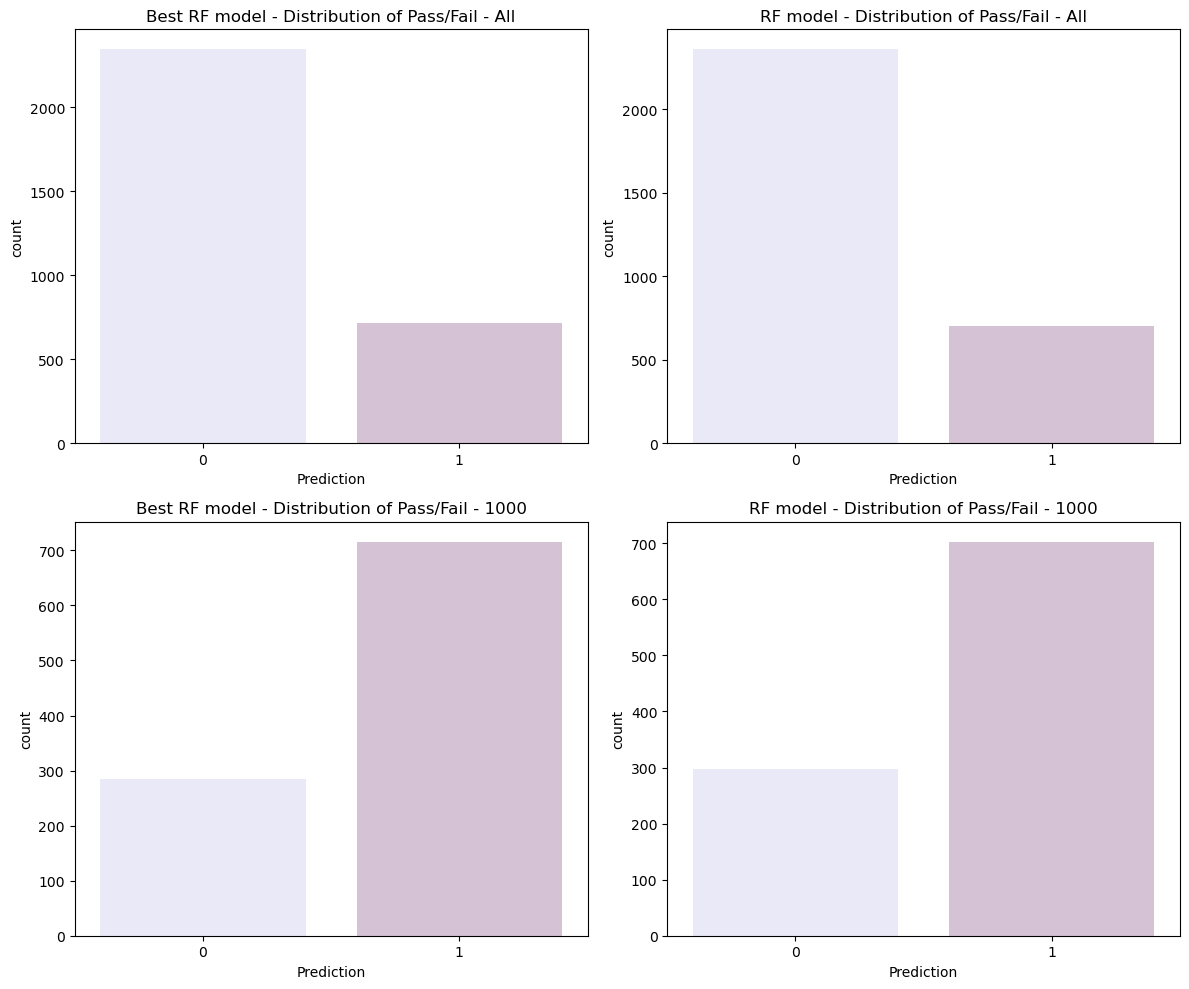

In [40]:

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1
sns.countplot(data=results_df, x="Prediction", ax=axes[0, 0], palette={0: "lavender", 1: "thistle"})
axes[0, 0].set_title("Best RF model - Distribution of Pass/Fail - All")

# Plot 2
sns.countplot(data=results_rf, x="Prediction", ax=axes[0, 1], palette={0: "lavender", 1: "thistle"})
axes[0, 1].set_title("RF model - Distribution of Pass/Fail - All")

# Plot 3
sns.countplot(data=subset_results, x="Prediction", ax=axes[1, 0], palette={0: "lavender", 1: "thistle"})
axes[1, 0].set_title("Best RF model - Distribution of Pass/Fail - 1000")

# Plot 4
sns.countplot(data=subset_results_rf, x="Prediction", ax=axes[1, 1], palette={0: "lavender", 1: "thistle"})
axes[1, 1].set_title("RF model - Distribution of Pass/Fail - 1000")

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


In [42]:
random_subset = chicago_inspections_2011_to_2013.sample(n=1000, random_state=10)
random_subset.shape

(1000, 39)

In [43]:
# process target 
# -----------
y_sim = random_subset['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_sim = y_sim.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_sim = lb_style.fit_transform(y_sim)

# recode 0s and 1s so 1s are "Fail"
y_sim = np.where(y_sim == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X_sim = random_subset.drop(columns = ['Results', 'Facility_Type',
                                      'LICENSE_DESCRIPTION',
                                      'WARD_PRECINCT'])


# get dummies
X_sim = pd.get_dummies(X_sim)

In [44]:
y_pred_sim = rf_best_model.predict(X_sim)

In [45]:
# Calculate and print metrics
accuracy = accuracy_score(y_sim, y_pred_sim)
recall = recall_score(y_sim, y_pred_sim)
precision = precision_score(y_sim, y_pred_sim)
f1 = f1_score(y_sim, y_pred_sim)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9810
Recall: 0.9468
Precision: 0.9519
F1 Score: 0.9493


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

## Answer
**After you make your predictions,
choose a metric that you think makes the most sense from a policy
perspective, explain your choice, and discuss your model’s performance.**

Since the random draw is from the training data perhaps good metrics (from the simulation above) are to be expected. For that reason, it is useful to use the model for prediction on the 2014 data, a dataset that the classifier was not trained on. As with the simulation, I used the best random forest classifier to predict if establishments would pass or fail in 2014. 

As stated above, I think the F1 score is important because it considered false positives and false negatives. I did check all metrics, though. Across most metrics the classifer did similarly or slightly worse than in training and simulation. Though, the metrics are still in the high 70s and 80s. Taken together, this may suggest that the model is overfitted to the training data, but would still provide some guidance as to which establishments should be audited compared to say a random number generator or human intuition. 

In [46]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [47]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

In [48]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [49]:
results_column = chicago_inspections_2014.pop('Results')

# Insert the column after the 'Inspection_Type'
inspection_type_index = chicago_inspections_2014.columns.get_loc('Inspection_Type')
chicago_inspections_2014.insert(inspection_type_index + 1, 'Results', results_column)

In [50]:
# process target 
# -----------
y_test2014 = chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 'Facility_Type',
                                      'LICENSE_DESCRIPTION',
                                      'WARD_PRECINCT'])


# get dummies
X_test2014 = pd.get_dummies(X_test2014)

In [51]:
# predict and compare 
# -----------
y_pred_test = rf_best_model.predict(X_test2014)
y_pred_test_rf = rf_classifier.predict(X_test2014)


In [52]:
# Calculate and print metrics
accuracy = accuracy_score(y_test2014, y_pred_test)
recall = recall_score(y_test2014, y_pred_test)
precision = precision_score(y_test2014, y_pred_test)
f1 = f1_score(y_test2014, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9027
Recall: 0.7883
Precision: 0.7401
F1 Score: 0.7634


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

Accuracy measures the percent of correct predictions out of total predictions. This means it captures both false positives and false negatives, and the rate of false positives is just as important as the rate of false negatives. However, in policy situations false positives and false negatives have real world consequences. And those consequences may vary in terms of severity. For example, we learned about a tool for sentencing prisoners. I would argue that in certain circumstances, it would be worse to be falsely imprisoned than to let someone go who committed a crime. Accuracy does not allow for these distinctions. 

As mentioned above, accuracy also doesn't account for imbalanced classes, which may exist in public policy data. For example, in healthcare, there may be way more healthy individuals than those diagnosed with a serious illness. However, it seems more important to be able to predict those who are diagnosed with a serious illness, so they can get treated. Accuracy would not prioritize accurately predicting who is sick, especially if the model is really good at predicted who is well. 

Metrics like precision, recall, and F1 provide a more detailed assessment of model performance. This allows policy makers project the real world consequences when using different models. Consequently, policy makers can use these additional metrics to minimize the most important errors and plan for the errors they choose not to minimize. 



2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...

This is an interesting question given the application. I'm not entirely confident that I am interpreting the variables correctly, but it seems like serious count and minor count, the two most important features are the number of infractions observed during an audit. Therefore, if an establishment made those changes to "avoid detection" that would be equivalent to actually improving their establishment to actually pass inspection. Additionally, it seems like the features are collected during the audit. An ideal policy situation to use machine learning is when you have existing data that you can use to predict an outcome of interest for which you do not have (and for which it would be expensive to collect separately). In this case, the data used for prediction is the same as the data with the outcome variables. 

For the sake of this question, let's assume 1) we have a policy situation where individuals or organizations can game the algorithm, so to speak; and 2) there exists a dataset that captures all of the features but not the results. In such cases, the oversight body should split their resources between random audits and targetted audits. The oversight body would use the prediction tool and available data to split the pool of establishments into "likely failers" and "likely passers." The governing body will audit the majority of likely failers and randomly audit a smaller portion of the likely passers. 

This method will solve a few problems. First, the non-random audits will be more cost effective because the governing body is focusing its efforts on establishments that may fail. The random audits serve a duel purpose to 1) deter establishments from trying to unfairly game the algorithm because they know they may still be audited even if they perform behaviors consistent with passing; and 2) collect more data that can be used to train future algorithms. 